In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam


In [2]:
df = pd.read_csv("bank-additional-full.csv", sep = ";")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.duplicated().sum()

12

In [6]:
# dropping duplicates
df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
uni = [df[i].unique() for i in df.columns]
uni

[array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
        49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
        28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
        77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
        74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64),
 array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
        'retired', 'management', 'unemployed', 'self-employed', 'unknown',
        'entrepreneur', 'student'], dtype=object),
 array(['married', 'single', 'divorced', 'unknown'], dtype=object),
 array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'unknown', 'university.degree',
        'illiterate'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'yes', 'unknown'], dtype=object),
 array(['no', 'yes', 'unknown'], dtype=object),
 array(['telephone', 'cellular'], dtype=object),
 array(['may',

C:\Users\anshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


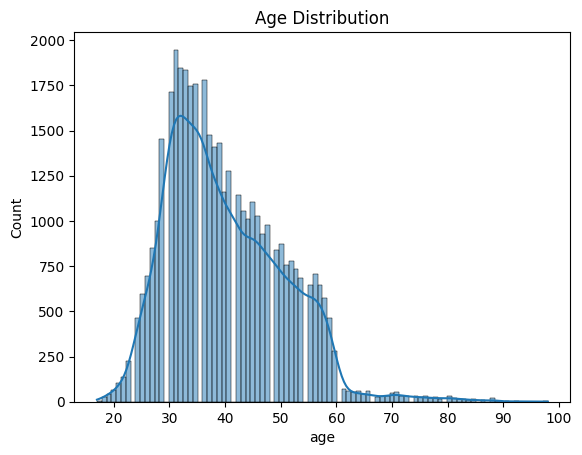

In [9]:
# age ditribution
sns.histplot(df["age"], kde = True)
plt.title("Age Distribution")
plt.show()

C:\Users\anshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


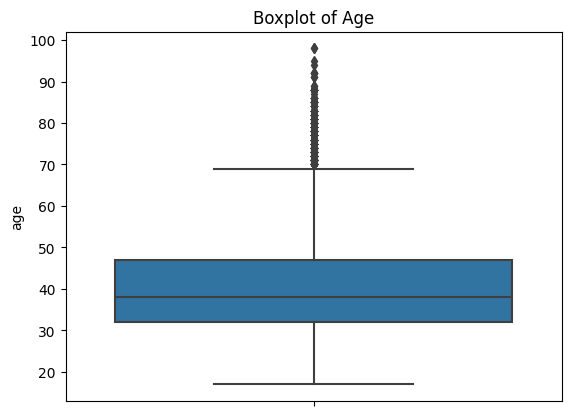

In [10]:
# Boxplot of age
sns.boxplot(y= df["age"])
plt.title("Boxplot of Age")
plt.show()

C:\Users\anshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


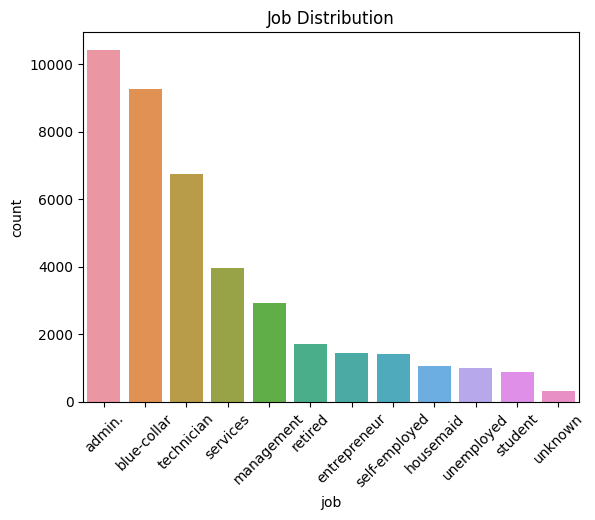

In [11]:
# Job Distribution
sns.countplot(data = df, x ="job", order = df["job"]. value_counts().index)
plt.title("Job Distribution")
plt.xticks(rotation = 45)
plt.show()

C:\Users\anshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


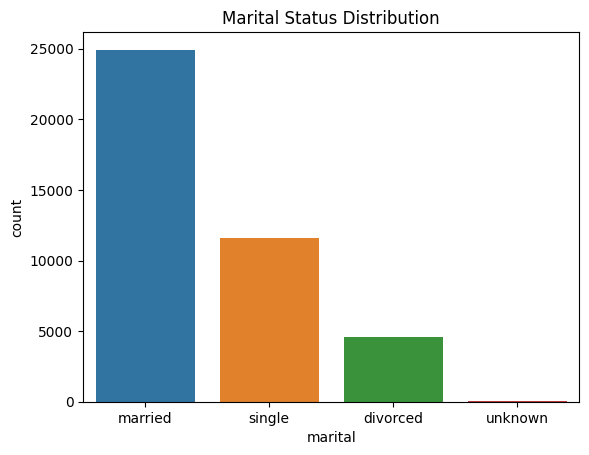

In [12]:
# Marital status Distribution
sns.countplot(data = df , x = "marital")
plt.title("Marital Status Distribution")
plt.show()

C:\Users\anshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


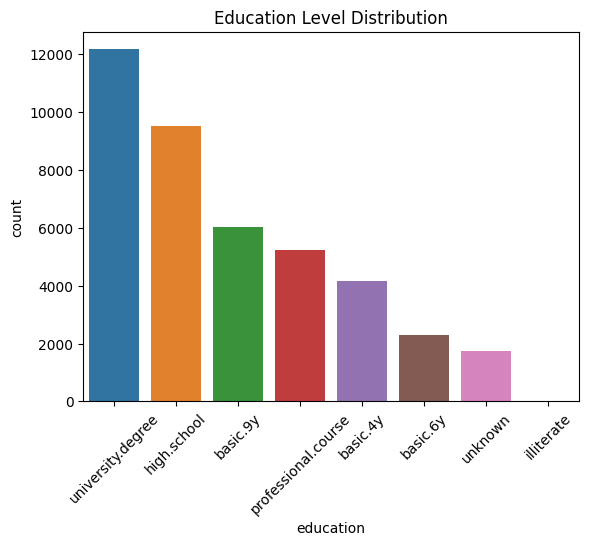

In [13]:
# Education
sns.countplot(data = df, x = "education", order = df["education"].value_counts().index)
plt.title("Education Level Distribution")
plt.xticks(rotation = 45)
plt.show()

C:\Users\anshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

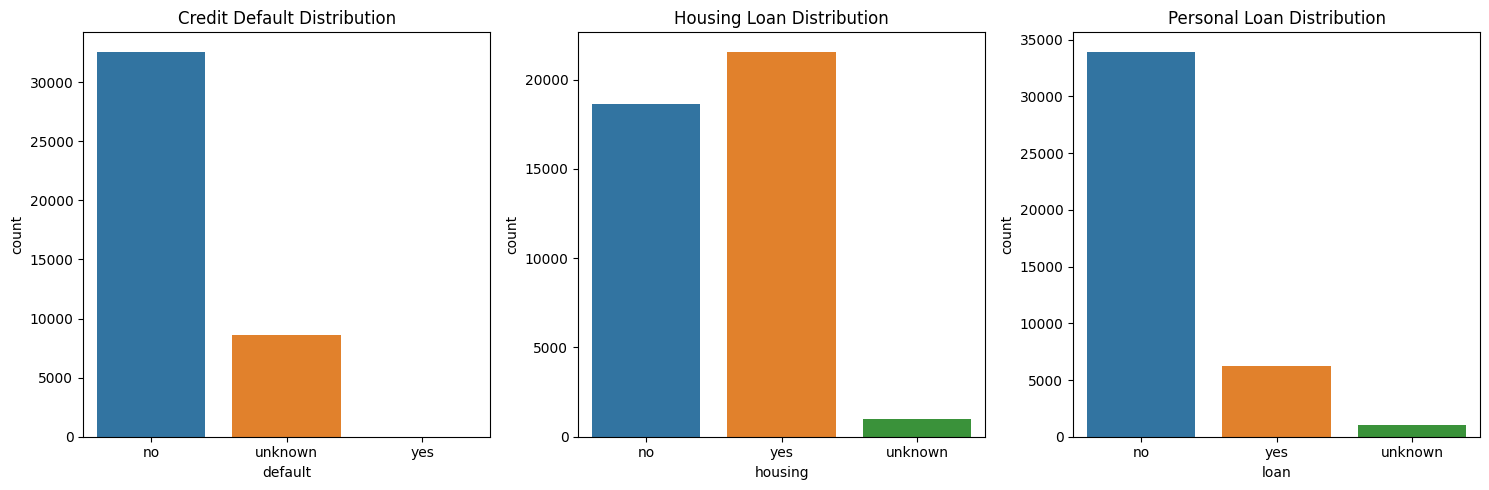

In [14]:
# Default, Housing, Loan
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(data=df, x='default', ax=ax[0])
ax[0].set_title('Credit Default Distribution')

sns.countplot(data=df, x='housing', ax=ax[1])
ax[1].set_title('Housing Loan Distribution')

sns.countplot(data=df, x='loan', ax=ax[2])
ax[2].set_title('Personal Loan Distribution')

plt.tight_layout()
plt.show()

C:\Users\anshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


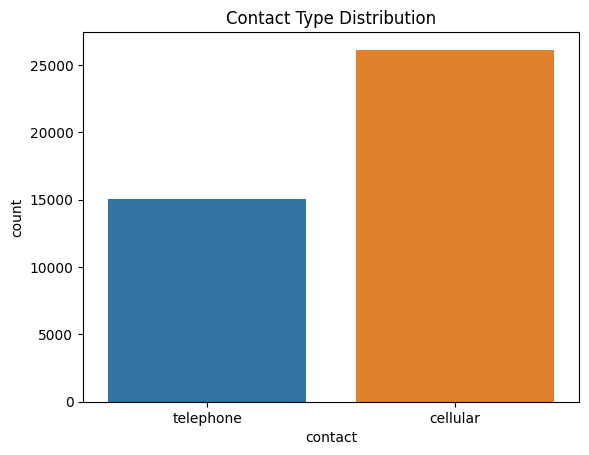

In [15]:
#Contact
sns.countplot(data=df, x='contact')
plt.title('Contact Type Distribution')
plt.show()

C:\Users\anshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


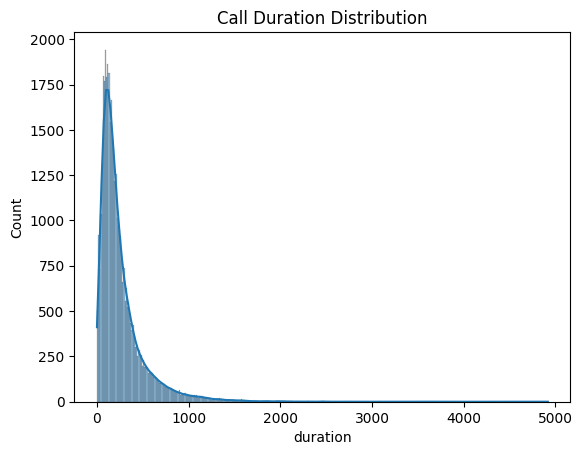

In [16]:
# Duration
sns.histplot(df['duration'], kde=True)
plt.title('Call Duration Distribution')
plt.show()

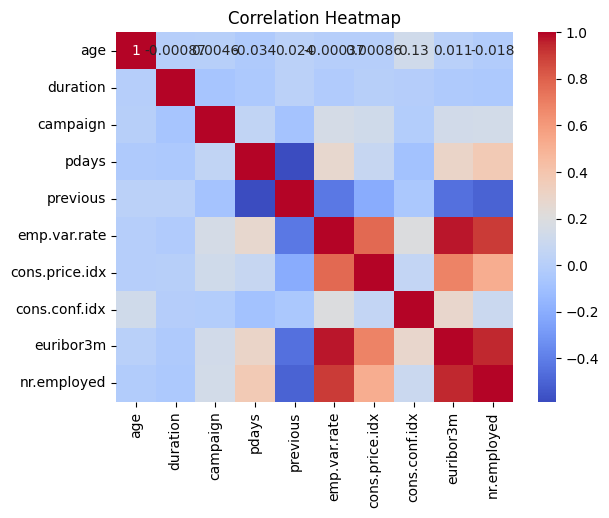

In [17]:
# Correlation Heatmap for Numeric Variables
corr = df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Using Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Eliminate columns based on feature significance
# selecting features and target
X = df[['euribor3m', 'nr.employed', 'emp.var.rate']]

# Converting ye and no to binary
y = df['y'].map({'yes': 1, 'no': 0}) 


# Training the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extracting feature importances
feature_importances = rf.feature_importances_

# Mapping features to their importance
features_dict = dict(zip(X.columns, feature_importances))

# Sorting and displaying the features by importance
sorted_features = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)

print(sorted_features)
[('euribor3m', 0.5394622074007565), ('nr.employed', 0.31405106535032856), ('emp.var.rate', 0.14648672724891493)]

[('euribor3m', 0.5394622074007565), ('nr.employed', 0.31405106535032856), ('emp.var.rate', 0.14648672724891493)]


[('euribor3m', 0.5394622074007565),
 ('nr.employed', 0.31405106535032856),
 ('emp.var.rate', 0.14648672724891493)]

In [19]:
df.drop(['emp.var.rate'],axis=1,inplace=True)
df.drop(['nr.employed'],axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [21]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()
print(non_numeric_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [22]:
# List of non-numeric columns excluding 'education' and target
non_numeric_cols.remove('education')
non_numeric_cols.remove('y')

# One-Hot Encoding for all non-numeric columns except 'education'
df = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)  # drop_first to avoid dummy variable trap

# Label Encoding for 'education'
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df.head()

,age,education,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0,261,1,999,0,93.994,-36.4,4.857,no,...,True,False,False,False,True,False,False,False,True,False
1,57,3,149,1,999,0,93.994,-36.4,4.857,no,...,True,False,False,False,True,False,False,False,True,False
2,37,3,226,1,999,0,93.994,-36.4,4.857,no,...,True,False,False,False,True,False,False,False,True,False
3,40,1,151,1,999,0,93.994,-36.4,4.857,no,...,True,False,False,False,True,False,False,False,True,False
4,56,3,307,1,999,0,93.994,-36.4,4.857,no,...,True,False,False,False,True,False,False,False,True,False


In [23]:
df.head()

,age,education,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0,261,1,999,0,93.994,-36.4,4.857,no,...,True,False,False,False,True,False,False,False,True,False
1,57,3,149,1,999,0,93.994,-36.4,4.857,no,...,True,False,False,False,True,False,False,False,True,False
2,37,3,226,1,999,0,93.994,-36.4,4.857,no,...,True,False,False,False,True,False,False,False,True,False
3,40,1,151,1,999,0,93.994,-36.4,4.857,no,...,True,False,False,False,True,False,False,False,True,False
4,56,3,307,1,999,0,93.994,-36.4,4.857,no,...,True,False,False,False,True,False,False,False,True,False


In [24]:
from sklearn.model_selection import train_test_split
X=df.drop('y',axis=1)
y=df['y']
y = (y == 'yes').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [25]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [26]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

# Define a function to create the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_resampled.shape[1], activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # Output layer

    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [28]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [29]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define k-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

In [30]:
# Initialize lists to store evaluation results
train_acc_scores = []
test_acc_scores = []

In [31]:
# Loop through each fold
for fold, (train_index, test_index) in enumerate(kf.split(X_train_resampled), 1):
    X_train_fold, X_val_fold = X_train_resampled[train_index], X_train_resampled[test_index]
    y_train_fold, y_val_fold = y_train_resampled[train_index], y_train_resampled[test_index]

In [32]:
# Create and compile the model
model = create_model()

In [33]:
# Train the model with early stopping
history=model.fit(
        X_train_fold, y_train_fold,
        epochs=20,  # You can adjust the maximum number of epochs
        batch_size=32,
        verbose=1,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping]  # Add the early stopping callback
    )
    

Epoch 1/20
1066/1066 [==============================] - 7s 5ms/step - loss: 0.4468 - accuracy: 0.8040 - val_loss: 0.2914 - val_accuracy: 0.8922
Epoch 2/20
1066/1066 [==============================] - 5s 5ms/step - loss: 0.3218 - accuracy: 0.8813 - val_loss: 0.2792 - val_accuracy: 0.8971
Epoch 3/20
1066/1066 [==============================] - 5s 4ms/step - loss: 0.2969 - accuracy: 0.8899 - val_loss: 0.2662 - val_accuracy: 0.9014
Epoch 4/20
1066/1066 [==============================] - 5s 5ms/step - loss: 0.2808 - accuracy: 0.8952 - val_loss: 0.2437 - val_accuracy: 0.9076
Epoch 5/20
1066/1066 [==============================] - 5s 5ms/step - loss: 0.2687 - accuracy: 0.9001 - val_loss: 0.2413 - val_accuracy: 0.9060
Epoch 6/20
1066/1066 [==============================] - 5s 5ms/step - loss: 0.2616 - accuracy: 0.9010 - val_loss: 0.2358 - val_accuracy: 0.9103
Epoch 7/20
1066/1066 [==============================] - 5s 4ms/step - loss: 0.2532 - accuracy: 0.9049 - val_loss: 0.2375 - val_accuracy:

In [34]:
# Evaluate on training data
train_acc = model.evaluate(X_train_fold, y_train_fold, verbose=0)[1]
train_acc_scores.append(train_acc)

In [35]:
# Evaluate on validation data
val_acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]
test_acc_scores.append(val_acc)
print(f"Fold {fold} completed.")


Fold 3 completed.


In [36]:
# Calculate and print the average accuracy scores
avg_train_acc = np.mean(train_acc_scores)
avg_test_acc = np.mean(test_acc_scores)
print(f'Average Training Accuracy: {avg_train_acc}')
print(f'Average Validation Accuracy: {avg_test_acc}')


Average Training Accuracy: 0.9456709623336792
Average Validation Accuracy: 0.9321526885032654


In [37]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

387/387 [==============================] - 1s 2ms/step - loss: 0.3017 - accuracy: 0.8789
Test Loss: 0.3017008900642395
Test Accuracy: 0.8789350390434265


In [38]:
# Get binary predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

387/387 [==============================] - 1s 2ms/step


In [39]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

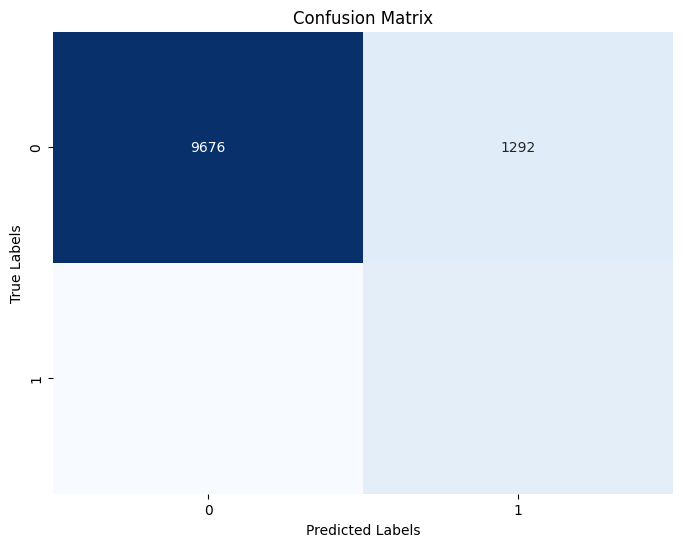

In [40]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()